# Visualization Notebook
This file can be used to plot your graph and to try out your solve function. It is not part of the grading.

In [4]:
pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


First we import necessary packages and then define our plotting function

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos=nx.get_node_attributes(G,'pos')
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()


Lets start by plotting the original street layout

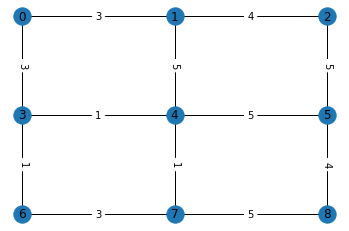

<class 'networkx.classes.graph.Graph'>
{'graph_attr_dict_factory': <class 'dict'>, 'node_dict_factory': <class 'dict'>, 'node_attr_dict_factory': <class 'dict'>, 'adjlist_outer_dict_factory': <class 'dict'>, 'adjlist_inner_dict_factory': <class 'dict'>, 'edge_attr_dict_factory': <class 'dict'>, 'graph': {}, '_node': {0: {'pos': [0, 2]}, 1: {'pos': [1, 2]}, 2: {'pos': [2, 2]}, 3: {'pos': [0, 1]}, 4: {'pos': [1, 1]}, 5: {'pos': [2, 1]}, 6: {'pos': [0, 0]}, 7: {'pos': [1, 0]}, 8: {'pos': [2, 0]}}, '_adj': {0: {1: {'weight': 3}, 3: {'weight': 3}}, 1: {0: {'weight': 3}, 2: {'weight': 4}, 4: {'weight': 5}}, 2: {1: {'weight': 4}, 5: {'weight': 5}}, 3: {0: {'weight': 3}, 4: {'weight': 1}, 6: {'weight': 1}}, 4: {1: {'weight': 5}, 3: {'weight': 1}, 5: {'weight': 5}, 7: {'weight': 1}}, 5: {2: {'weight': 5}, 4: {'weight': 5}, 8: {'weight': 4}}, 6: {3: {'weight': 1}, 7: {'weight': 3}}, 7: {4: {'weight': 1}, 6: {'weight': 3}, 8: {'weight': 5}}, 8: {5: {'weight': 4}, 7: {'weight': 5}}}, 'nodes': Node

In [7]:
# Instance to solve
full_instance_path = 'data_2.json'

with open(full_instance_path) as f:
    data = json.load(f)
    g_street = json_graph.node_link_graph(data['graph'])

plot_graph(g_street, True, True)

# get type of graph
print(type(g_street))
# show attributes of graph， class 'networkx.classes.graph.Graph'
print(g_street.__dict__)


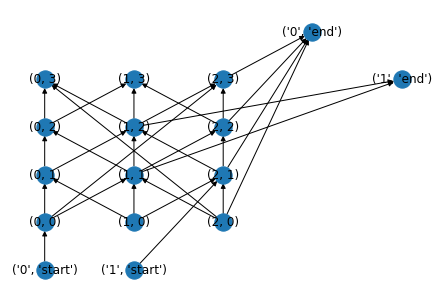

[((0, 0), (1, 1)), ((0, 0), (2, 3)), ((0, 0), (0, 1)), ((0, 1), (1, 2)), ((0, 1), (0, 2)), ((0, 2), (1, 3)), ((0, 2), (0, 3)), ((2, 0), (0, 3)), ((2, 0), (1, 1)), ((2, 0), (2, 1)), ((2, 0), ('0', 'end')), ((2, 1), (1, 2)), ((2, 1), (2, 2)), ((2, 1), ('0', 'end')), ((2, 2), (1, 3)), ((2, 2), (2, 3)), ((2, 2), ('0', 'end')), ((2, 3), ('0', 'end')), ((1, 0), (0, 1)), ((1, 0), (2, 1)), ((1, 0), (1, 1)), ((1, 1), (0, 2)), ((1, 1), (2, 2)), ((1, 1), (1, 2)), ((1, 1), ('1', 'end')), ((1, 2), (0, 3)), ((1, 2), (2, 3)), ((1, 2), (1, 3)), ((1, 2), ('1', 'end')), (('1', 'start'), (2, 1)), (('0', 'start'), (0, 0))]
[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 3), (1, 0), (1, 1), (1, 2), (1, 3), ('1', 'start'), ('1', 'end'), ('0', 'start'), ('0', 'end')]
max:  3
start (0, 0)
edge ((0, 0), (1, 1)) , with weight 1
2 3  with result  1
bbb (1, 0) (0, 1)
edge ((0, 0), (2, 3)) , with weight 3
6 3  with result  3
bbb (2, 0) (0, 3)
start (0, 1)
edge ((0, 1), (1, 2)) , with weight 1
3 3  wit

In [5]:
from agv import *

import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos=nx.get_node_attributes(G,'pos')
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()









# Instance to solve
full_instance_path = 'data_4.json'
jobs, g_street= read_instance(full_instance_path)

# Construct graph --- NOTE: Please use networkx for this task, it is necessary for the plots in the Jupyter file.
g_time_expanded = nx.DiGraph()

build_graph_nodes(g_street, jobs, g_time_expanded)

build_graph_arcs(g_street, jobs, g_time_expanded)


plot_graph(G=g_time_expanded, plot_weights=False, pos_given=True)

print(g_time_expanded.edges)
print(g_time_expanded.nodes)

max_j_d = max([job['j_d'] for job in jobs.values()])
print('max: ',max_j_d)

for node in g_time_expanded.nodes:
    if node[1] != 'start' and node[1] != 'end':
        print('start', node)
        for e in g_time_expanded.out_edges(node):
                if e[0][0] != e[1][0] and e[1][1] != 'end' and e[1][1] != 'start':
                    print("edge", e, ", with weight" ,g_time_expanded.edges[e]['weight'])
                    print(e[1][1] + g_time_expanded.edges[e]['weight'],  max_j_d, " with result ",(g_time_expanded.edges[e]['weight'], max_j_d)[(e[1][1] + g_time_expanded.edges[e]['weight']) >= max_j_d] )
                    for w in range((g_time_expanded.edges[e]['weight'], max_j_d - e[1][1] + 1)[(e[1][1] + g_time_expanded.edges[e]['weight']) > max_j_d]):
                        print("bbb", (e[1][0], e[0][1] + w), (e[0][0], e[1][1] + w))


                        

Now we solve the instance and retrieve the time-expanded graph

In [3]:
from agv import *

import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos=nx.get_node_attributes(G,'pos')
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()


full_instance_path = 'data_1.json'
model, g_time_expanded, res = solve(full_instance_path)

plot_graph(G=res, plot_weights=False, pos_given=True)


Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 28 rows, 28 columns and 74 nonzeros
Model fingerprint: 0xdf4548c6
Variable types: 0 continuous, 28 integer (28 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1.0000000
Presolve removed 28 rows and 28 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 12 available processors)

Solution count 1: 1 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+00, best bound 1.000000000000e+00, gap 0.0000%


TypeError: plot_graph() got an unexpected keyword argument 'edge_color'

Let's plot your time expanded graph - set the first flag to true if you added weights to your arcs and the second flag to true if you added positions to your nodes (recommended!). For example, you may use the time steps as y coordinates and the location IDs as x coordinates.

**NOTE:** This is just an example for your convenience, you do not need to add positions to your nodes or plot your graph for your submission.

In [ ]:
plot_graph(G=g_time_expanded, plot_weights=False, pos_given=True)


In [8]:
import gurobipy as gp

arcs, capacity = gp.multidict({
    ('Detroit', 'Boston'):   100,
    ('Detroit', 'New York'):  80,
    ('Detroit', 'Seattle'):  120,
    ('Denver',  'Boston'):   120,
    ('Denver',  'New York'): 120,
    ('Denver',  'Seattle'):  120})

print(arcs)

print(capacity)

print(arcs[0])
print(capacity[('Detroit', 'Boston')])

<gurobi.tuplelist (6 tuples, 2 values each):
 ( Detroit , Boston   )
 ( Detroit , New York )
 ( Detroit , Seattle  )
 ( Denver  , Boston   )
 ( Denver  , New York )
 ( Denver  , Seattle  )
>
{('Detroit', 'Boston'): 100, ('Detroit', 'New York'): 80, ('Detroit', 'Seattle'): 120, ('Denver', 'Boston'): 120, ('Denver', 'New York'): 120, ('Denver', 'Seattle'): 120}
('Detroit', 'Boston')
100


In [ ]:
from agv import *

# Instance to solve
full_instance_path = 'data_4.json'
jobs, g_street= read_instance(full_instance_path)

# print weight of every edge from g_street
for edge in g_street.edges():
    print('weight: ', edge, g_street.edges[edge]['weight'])

# New directed graph
g_time_expanded = nx.DiGraph()



plot_graph(G=g_time_expanded, plot_weights=False, pos_given=True)